In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import auc
import nltk
nltk.download('vader_lexicon')
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
import pickle
X_train_1 = pickle.load(open("/content/drive/MyDrive/Resume Project/Donors Choose Dataset/X_train_1.pkl",'rb'))
X_test_1 = pickle.load(open("/content/drive/MyDrive/Resume Project/Donors Choose Dataset/X_test_1.pkl",'rb'))
X_train_2 = pickle.load(open("/content/drive/MyDrive/Resume Project/Donors Choose Dataset/X_train_2.pkl",'rb'))
X_test_2 = pickle.load(open("/content/drive/MyDrive/Resume Project/Donors Choose Dataset/X_test_2.pkl",'rb'))
y_train = pickle.load(open("/content/drive/MyDrive/Resume Project/Donors Choose Dataset/y_train.pkl",'rb'))
y_test = pickle.load(open("/content/drive/MyDrive/Resume Project/Donors Choose Dataset/y_test.pkl",'rb'))

##Set1

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
clf = DecisionTreeClassifier()
param = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

search1 = RandomizedSearchCV(estimator = clf , param_distributions=param , scoring='roc_auc',return_train_score=True)
search1 = search1.fit(X_train_1,y_train)
best_clf_1 = search1.best_estimator_
best_clf_1

DecisionTreeClassifier(max_depth=50, min_samples_split=10)

In [5]:
results = search1.cv_results_['params']
score = search1.cv_results_['mean_test_score']
max_depth,min_sample_split=[],[]
for i in range(len(results)):
  max_depth.append(results[i]['max_depth'])
  min_sample_split.append(results[i]['min_samples_split'])

In [6]:
a = [[0 for col in range(10)]for row in range(10)]

for i in range(len(max_depth)):
  for j in tqdm(range(len(min_sample_split))):
    a[i][j]=score[j]
    
a= np.reshape(a,(10,10))
a= pd.DataFrame(a, columns=max_depth , index = min_sample_split)

100%|██████████| 10/10 [00:00<00:00, 86838.59it/s]


[Text(51.0, 0.5, 'min_sample_split'), Text(0.5, 51.0, 'max-depth')]

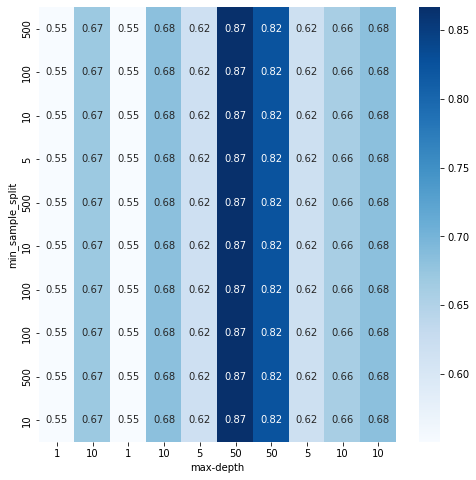

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(8, 8)) 
import seaborn as sns
sns.heatmap(a,annot=True,fmt='.2g', linecolor='white', cmap='Blues')
ax.set(xlabel='max-depth', ylabel='min_sample_split')

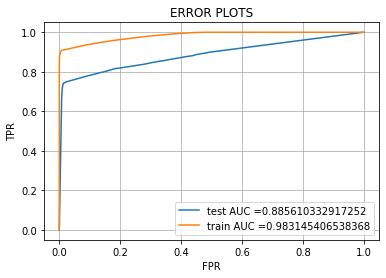

In [8]:
from sklearn.metrics import roc_curve
best_clf_1.fit(X_train_1,y_train)

y_test_pred = best_clf_1.predict_proba(X_test_1)
y_train_pred = best_clf_1.predict_proba(X_train_1)
train_fpr , train_tpr , train_thresold =roc_curve(y_train, y_train_pred[:,1:])
test_fpr , test_tpr , test_thresold =roc_curve(y_test, y_test_pred[:,1:])
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
test_auc_1 = auc(test_fpr, test_tpr)
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [9]:
def find_class_level(data):
  class_label=[]
  for i in range(len(data)):
    if data[i]>0.5:
      class_label.append(1)
    else:
      class_label.append(0)
  return class_label

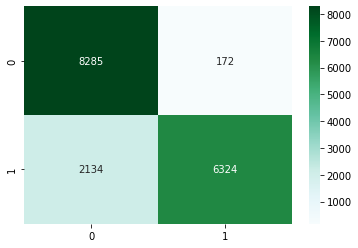

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,find_class_level(y_test_pred[:,1]))
sns.heatmap(cm , annot=True ,fmt='d' ,cmap='BuGn')

##Set2

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
clf = DecisionTreeClassifier()
param = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}

search2 = RandomizedSearchCV(estimator = clf , param_distributions=param , scoring='roc_auc',return_train_score=True)
search2 = search2.fit(X_train_2,y_train)
best_clf_2 = search2.best_estimator_
best_clf_2

DecisionTreeClassifier(max_depth=50, min_samples_split=100)

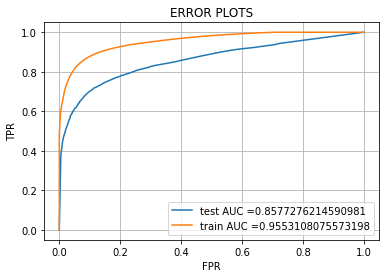

In [12]:
best_clf_2.fit(X_train_2,y_train)

y_test_pred = best_clf_2.predict_proba(X_test_2)
y_train_pred = best_clf_2.predict_proba(X_train_2)

test_fpr , test_tpr , test_thresold =roc_curve(y_test, y_test_pred[:,1:])
train_fpr , train_tpr , train_thresold =roc_curve(y_train, y_train_pred[:,1:])
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
test_auc_2 = auc(test_fpr, test_tpr)
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

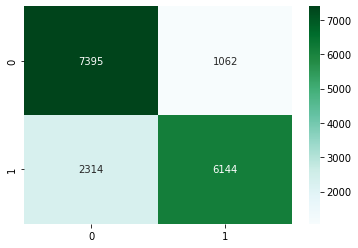

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,find_class_level(y_test_pred[:,1]))
sns.heatmap(cm , annot=True ,fmt='d' ,cmap='BuGn')

In [14]:
df = pd.DataFrame({'Actual':y_test , 'Pred':find_class_level(y_test_pred[:,1])})
idx = list(df[(df['Actual']==0) & (df['Pred']==1)].index)
fp_essay = dataframe['essay'][idx]

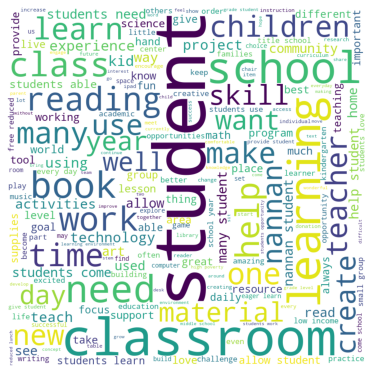

In [15]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
comment_words = '' 
for val in list(fp_essay): 
    val = str(val) 
    tokens = val.split()    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words)                         
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [20]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Max_depth","Min_split_size", "AUC"]
x.add_row(['TF-IDF' , search1.best_params_['max_depth'] ,search1.best_params_['min_samples_split'], test_auc_1 ])
x.add_row(['Avg-W2V' , search2.best_params_['max_depth'] ,search2.best_params_['min_samples_split'], test_auc_2 ])
print(x)

+------------+-----------+----------------+--------------------+
| Vectorizer | Max_depth | Min_split_size |        AUC         |
+------------+-----------+----------------+--------------------+
|   TF-IDF   |     50    |       10       | 0.885610332917252  |
|  Avg-W2V   |     50    |      100       | 0.8577276214590981 |
+------------+-----------+----------------+--------------------+
